# Merging data

## In this notebook we bring together data from various sets to prepare for analysis.

### There are several different sets that are merged in this notebook.

[FSTI2 Buoy (Daily Averages)-Ohare-Lake MIchigan (2015-2018)](#buoyAverages_ohare_lake_jan012015_dec312018)  
[FSTI2 Buoy (Full data set)-Ohare-Lake Michigan (2015-2018)](#buoyFull_ohare_lake_jan012015_dec312018)  
[Garden-Ohare-Lake Michigan (1995-2018)](#garden_ohare_lake_jan011995_dec312018)

### Resource used to determine various day counts:
[timeanddate.com](https://www.timeanddate.com/date/durationresult.html?m1=04&d1=1&y1=2013&m2=12&d2=31&y2=2018&ti=on)

We considered exploring sets with different amounts of day counts.  

Note: there are 

 - **8766** days in **01/01/1995 - 12/31/2018**, when you include both the first and last days in the set.
 - **3377** days in **01/01/2010 - 03/31/2019**, when you include both the first and last days in the set.
 - **2101** days in **04/01/2013 - 12/31/2018**, when you include both the first and last days in the set.
 - **1550** days in **01/01/2015 - 03/31/2019**, when you include both the first and last days in the set.
 - **1461** days in **01/01/2015 - 12/31/2018**, when you include both the first and last days in the set.

### Datasets included in this workbook:
 - buoy data from
  - Fsti2, Foster Beach
  
 - Ohare weather data
 - Chicago Botanical Garden weather data
  
 - Lake Michigan Daily average temperatures

In [1]:
import pandas as pd
import time
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

<a id='buoyAverages_ohare_lake_jan012015_dec312018'></a>
# Dates: Jan 01, 2015 - Dec 31, 2018, daily averages

#### 1461 days included

### Datasets included:
 - Fsti2, Foster Beach buoy data
  
 - O'Hare weather data
  
 - Lake Michigan Daily average temperatures

### Data Sources
#### [CHICAGO OHARE INTERNATIONAL AIRPORT, IL US](https://www.ncdc.noaa.gov/cdo-web/datasets/GHCND/stations/GHCND:USW00094846/detail)
 - Source: [National Centers for Environmental Information](https://www.ncdc.noaa.gov/cdo-web/search)  
 - [GHCN (Global Historical Climatology Network) – Daily Documentation](https://www1.ncdc.noaa.gov/pub/data/cdo/documentation/GHCND_documentation.pdf)
  - ID	GHCND:USW00094846  
    41.995 N 87.9336 W 
 - [Airport Information](https://www.flychicago.com/ohare/home/pages/default.aspx)

#### [Station FSTI2 - Foster Ave., Chicago, IL](https://www.ndbc.noaa.gov/station_page.php?station=fsti2)
 - Source: [National Data Buoy Center](https://www.ndbc.noaa.gov/)

 - Owned and maintained by [Chicago Park District](https://www.ndbc.noaa.gov/ndbcexit.php?url=https://wqdatalive.com/public/16&blurb=Chicago+Park+District)  
    41.976 N 87.648 W (41°58'35" N 87°38'51" W)
    
#### [Lake Michigan](https://www.google.com/search?q=lake+michigan&oq=lake+michigan&aqs=chrome.0.69i59j69i60l3j69i59j0.3015j0j9&sourceid=chrome&ie=UTF-8)
 - Source: [Great Lakes Statistics: Average Surface Water Temperature from the Great Lakes Surface Environmental Analysis (GLSEA)](https://coastwatch.glerl.noaa.gov/statistic/statistic.html)
 - 44.0 -87.0 (44° 00' 0.00" N 87° 00' 0.00" W)
 - [Data Set for 2018](https://coastwatch.glerl.noaa.gov/ftp/glsea/avgtemps/2018/glsea-temps2018_1024.dat)

In [2]:
# buoy FSTI2
buoy = pd.read_csv('data/buoy_FSTI2/jan012015_dec312018_averages.csv')
print(buoy.shape)
buoy.head()

(1461, 4)


,DATE,WDIR,WSPD,ATMP
0,2015-01-01,238.333333,9.890476,-5.928571
1,2015-01-02,216.086957,6.230435,-2.204348
2,2015-01-03,181.916667,5.654167,0.395833
3,2015-01-04,313.750000,8.779167,-1.545833
4,2015-01-05,262.166667,9.537500,-16.145833


In [3]:
buoy.rename(mapper={'WDIR': 'buoy_wdir',
                    'WSPD': 'buoy_wspd',
                    'ATMP': 'buoy_atmp'}, 
            axis=1, 
            inplace=True)

buoy.head()

,DATE,buoy_wdir,buoy_wspd,buoy_atmp
0,2015-01-01,238.333333,9.890476,-5.928571
1,2015-01-02,216.086957,6.230435,-2.204348
2,2015-01-03,181.916667,5.654167,0.395833
3,2015-01-04,313.750000,8.779167,-1.545833
4,2015-01-05,262.166667,9.537500,-16.145833


In [4]:
# ohare weather data (Jan 01, 2015 to Dec 31, 2018)

ohare = pd.read_csv('data/ohare/jan012015_dec312018_averages.csv')
print(ohare.shape)
ohare.head()

(1461, 10)


,DATE,AWND,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN,WDF2,WSF2
0,2015-01-01,14.54,0.00,0.0,0.0,20.0,32,14,240,23.9
1,2015-01-02,4.70,0.00,0.0,0.0,26.0,34,15,150,12.1
2,2015-01-03,5.59,0.57,0.4,0.0,31.0,34,29,140,13.0
3,2015-01-04,15.88,0.13,2.2,1.2,29.0,33,2,320,25.9
4,2015-01-05,10.29,0.15,1.8,2.0,2.0,6,-3,310,21.9


In [5]:
# ohare.drop(columns=['WSF2', 'WDF2'], inplace=True)
# ohare.head()

In [6]:
ohare.rename(mapper={'AWND': 'ohare_wspd',
                     'PRCP': 'ohare_prcp',
                     'SNOW': 'ohare_snfall',
                     'SNWD': 'ohare_sndpth',
                     'TAVG': 'ohare_atmp',
                     'TMAX': 'ohare_maxtmp',
                     'TMIN': 'ohare_mintmp',
                     'WDF2': 'ohare_w2dir',
                     'WSF2': 'ohare_w2spd'},
             axis=1,
             inplace=True)

ohare.head()

,DATE,ohare_wspd,ohare_prcp,ohare_snfall,ohare_sndpth,ohare_atmp,ohare_maxtmp,ohare_mintmp,ohare_w2dir,ohare_w2spd
0,2015-01-01,14.54,0.00,0.0,0.0,20.0,32,14,240,23.9
1,2015-01-02,4.70,0.00,0.0,0.0,26.0,34,15,150,12.1
2,2015-01-03,5.59,0.57,0.4,0.0,31.0,34,29,140,13.0
3,2015-01-04,15.88,0.13,2.2,1.2,29.0,33,2,320,25.9
4,2015-01-05,10.29,0.15,1.8,2.0,2.0,6,-3,310,21.9


In [7]:
# lake michigan daily average temps
lake_mic = pd.read_csv('data/lake_michigan/jan012015_dec312018_averages.csv')
print(lake_mic.shape)
lake_mic.head()

(1461, 2)


,DATE,lake_temp
0,2015-01-01,3.53
1,2015-01-02,3.50
2,2015-01-03,3.49
3,2015-01-04,3.36
4,2015-01-05,3.16


In [8]:
data = pd.concat([lake_mic, buoy.drop(columns='DATE'), ohare.drop(columns='DATE')], axis=1)
print(data.shape)
data.head()

(1461, 14)


,DATE,lake_temp,buoy_wdir,buoy_wspd,buoy_atmp,ohare_wspd,ohare_prcp,ohare_snfall,ohare_sndpth,ohare_atmp,ohare_maxtmp,ohare_mintmp,ohare_w2dir,ohare_w2spd
0,2015-01-01,3.53,238.333333,9.890476,-5.928571,14.54,0.00,0.0,0.0,20.0,32,14,240,23.9
1,2015-01-02,3.50,216.086957,6.230435,-2.204348,4.70,0.00,0.0,0.0,26.0,34,15,150,12.1
2,2015-01-03,3.49,181.916667,5.654167,0.395833,5.59,0.57,0.4,0.0,31.0,34,29,140,13.0
3,2015-01-04,3.36,313.750000,8.779167,-1.545833,15.88,0.13,2.2,1.2,29.0,33,2,320,25.9
4,2015-01-05,3.16,262.166667,9.537500,-16.145833,10.29,0.15,1.8,2.0,2.0,6,-3,310,21.9


In [9]:
data.isnull().sum()

DATE            0
lake_temp       0
buoy_wdir       0
buoy_wspd       0
buoy_atmp       0
ohare_wspd      0
ohare_prcp      0
ohare_snfall    0
ohare_sndpth    0
ohare_atmp      0
ohare_maxtmp    0
ohare_mintmp    0
ohare_w2dir     0
ohare_w2spd     0
dtype: int64

In [10]:
# saving the data
data.to_csv('data/merged/jan012015_dec312018_averages.csv', index=False)

In [11]:
merged = pd.read_csv('data/merged/jan012015_dec312018_averages.csv')
print(merged.shape)
merged.head()

(1461, 14)


,DATE,lake_temp,buoy_wdir,buoy_wspd,buoy_atmp,ohare_wspd,ohare_prcp,ohare_snfall,ohare_sndpth,ohare_atmp,ohare_maxtmp,ohare_mintmp,ohare_w2dir,ohare_w2spd
0,2015-01-01,3.53,238.333333,9.890476,-5.928571,14.54,0.00,0.0,0.0,20.0,32,14,240,23.9
1,2015-01-02,3.50,216.086957,6.230435,-2.204348,4.70,0.00,0.0,0.0,26.0,34,15,150,12.1
2,2015-01-03,3.49,181.916667,5.654167,0.395833,5.59,0.57,0.4,0.0,31.0,34,29,140,13.0
3,2015-01-04,3.36,313.750000,8.779167,-1.545833,15.88,0.13,2.2,1.2,29.0,33,2,320,25.9
4,2015-01-05,3.16,262.166667,9.537500,-16.145833,10.29,0.15,1.8,2.0,2.0,6,-3,310,21.9


<a id='buoyFull_ohare_lake_jan012015_dec312018'></a>
# Dates: January 1, 2015 - Dec 31, 2018, all data for buoy FSTI2.

#### 1461 days

### Datasets included:
 - Fsti2, Foster Beach buoy data
  
 - O'Hare weather data
  
 - Lake Michigan Daily average temperatures

In [1]:
import pandas as pd
import numpy as np

In [2]:
# buoy FSTI2

buoy = pd.read_csv('data/buoy_FSTI2/jan012015_dec312018.csv')
print(buoy.shape)
buoy.head()

(34057, 8)


,#YY,MM,DD,hh,mm,WDIR,WSPD,ATMP
0,2015,1,1,0,0,235,7.0,-7.4
1,2015,1,1,1,0,253,9.5,-7.4
2,2015,1,1,2,0,210,8.5,-7.4
3,2015,1,1,3,0,249,10.2,-7.3
4,2015,1,1,4,0,246,8.1,-7.0


In [3]:
buoy['DATE'] = pd.to_datetime(buoy['#YY']*10000 + buoy['MM']*100 + buoy['DD'], format = '%Y%m%d')
print(buoy.shape)
buoy.head()

(34057, 9)


,#YY,MM,DD,hh,mm,WDIR,WSPD,ATMP,DATE
0,2015,1,1,0,0,235,7.0,-7.4,2015-01-01
1,2015,1,1,1,0,253,9.5,-7.4,2015-01-01
2,2015,1,1,2,0,210,8.5,-7.4,2015-01-01
3,2015,1,1,3,0,249,10.2,-7.3,2015-01-01
4,2015,1,1,4,0,246,8.1,-7.0,2015-01-01


In [4]:
buoy.columns

Index(['#YY', 'MM', 'DD', 'hh', 'mm', 'WDIR', 'WSPD', 'ATMP', 'DATE'], dtype='object')

In [5]:
buoy = buoy[['DATE', 'hh', 'WDIR', 'WSPD', 'ATMP']]
print(buoy.shape)
buoy.head()

(34057, 5)


,DATE,hh,WDIR,WSPD,ATMP
0,2015-01-01,0,235,7.0,-7.4
1,2015-01-01,1,253,9.5,-7.4
2,2015-01-01,2,210,8.5,-7.4
3,2015-01-01,3,249,10.2,-7.3
4,2015-01-01,4,246,8.1,-7.0


In [6]:
buoy.rename(mapper={'WDIR': 'buoy_wdir',
                    'WSPD': 'buoy_wspd',
                    'ATMP': 'buoy_atmp'}, 
            axis=1, 
            inplace=True)

buoy.head()

,DATE,hh,buoy_wdir,buoy_wspd,buoy_atmp
0,2015-01-01,0,235,7.0,-7.4
1,2015-01-01,1,253,9.5,-7.4
2,2015-01-01,2,210,8.5,-7.4
3,2015-01-01,3,249,10.2,-7.3
4,2015-01-01,4,246,8.1,-7.0


In [7]:
# ohare weather data (Jan 01, 2015 to Dec 31, 2018)

ohare = pd.read_csv('data/ohare/jan012015_dec312018_averages.csv')
print(ohare.shape)
ohare.head()

(1461, 10)


,DATE,AWND,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN,WDF2,WSF2
0,2015-01-01,14.54,0.00,0.0,0.0,20.0,32,14,240,23.9
1,2015-01-02,4.70,0.00,0.0,0.0,26.0,34,15,150,12.1
2,2015-01-03,5.59,0.57,0.4,0.0,31.0,34,29,140,13.0
3,2015-01-04,15.88,0.13,2.2,1.2,29.0,33,2,320,25.9
4,2015-01-05,10.29,0.15,1.8,2.0,2.0,6,-3,310,21.9


In [8]:
ohare.rename(mapper={'AWND': 'ohare_wspd',
                     'PRCP': 'ohare_prcp',
                     'SNOW': 'ohare_snfall',
                     'SNWD': 'ohare_sndpth',
                     'TAVG': 'ohare_atmp',
                     'TMAX': 'ohare_maxtmp',
                     'TMIN': 'ohare_mintmp',
                     'WDF2': 'ohare_w2dir',
                     'WSF2': 'ohare_w2spd'},
             axis=1,
             inplace=True)

ohare.head()

,DATE,ohare_wspd,ohare_prcp,ohare_snfall,ohare_sndpth,ohare_atmp,ohare_maxtmp,ohare_mintmp,ohare_w2dir,ohare_w2spd
0,2015-01-01,14.54,0.00,0.0,0.0,20.0,32,14,240,23.9
1,2015-01-02,4.70,0.00,0.0,0.0,26.0,34,15,150,12.1
2,2015-01-03,5.59,0.57,0.4,0.0,31.0,34,29,140,13.0
3,2015-01-04,15.88,0.13,2.2,1.2,29.0,33,2,320,25.9
4,2015-01-05,10.29,0.15,1.8,2.0,2.0,6,-3,310,21.9


In [9]:
ohare.dtypes

DATE             object
ohare_wspd      float64
ohare_prcp      float64
ohare_snfall    float64
ohare_sndpth    float64
ohare_atmp      float64
ohare_maxtmp      int64
ohare_mintmp      int64
ohare_w2dir       int64
ohare_w2spd     float64
dtype: object

In [10]:
ohare['DATE'] = pd.to_datetime(ohare['DATE'])
ohare.dtypes

DATE            datetime64[ns]
ohare_wspd             float64
ohare_prcp             float64
ohare_snfall           float64
ohare_sndpth           float64
ohare_atmp             float64
ohare_maxtmp             int64
ohare_mintmp             int64
ohare_w2dir              int64
ohare_w2spd            float64
dtype: object

In [11]:
# lake michigan daily average temps

lake_mic = pd.read_csv('data/lake_michigan/jan012015_dec312018_averages.csv')
print(lake_mic.shape)
lake_mic.head()

(1461, 2)


,DATE,lake_temp
0,2015-01-01,3.53
1,2015-01-02,3.50
2,2015-01-03,3.49
3,2015-01-04,3.36
4,2015-01-05,3.16


In [12]:
buoy.dtypes

DATE         datetime64[ns]
hh                    int64
buoy_wdir             int64
buoy_wspd           float64
buoy_atmp           float64
dtype: object

In [13]:
lake_mic.dtypes

DATE          object
lake_temp    float64
dtype: object

In [14]:
lake_mic['DATE'] = pd.to_datetime(lake_mic['DATE'])
lake_mic.dtypes

DATE         datetime64[ns]
lake_temp           float64
dtype: object

In [15]:
# df = pd.merge(prices, filings, left_index=True, right_index=True, how='left')

data = pd.merge(buoy, lake_mic, on='DATE', right_index=False, left_index=True)
print(data.shape)
data.head()

(34057, 6)


,DATE,hh,buoy_wdir,buoy_wspd,buoy_atmp,lake_temp
0,2015-01-01,0,235,7.0,-7.4,3.53
0,2015-01-01,1,253,9.5,-7.4,3.53
0,2015-01-01,2,210,8.5,-7.4,3.53
0,2015-01-01,3,249,10.2,-7.3,3.53
0,2015-01-01,4,246,8.1,-7.0,3.53


In [16]:
data = pd.merge(data, ohare, on='DATE', right_index=False, left_index=True)
print(data.shape)
data.head()

(34057, 15)


,DATE,hh,buoy_wdir,buoy_wspd,buoy_atmp,lake_temp,ohare_wspd,ohare_prcp,ohare_snfall,ohare_sndpth,ohare_atmp,ohare_maxtmp,ohare_mintmp,ohare_w2dir,ohare_w2spd
0,2015-01-01,0,235,7.0,-7.4,3.53,14.54,0.0,0.0,0.0,20.0,32,14,240,23.9
0,2015-01-01,1,253,9.5,-7.4,3.53,14.54,0.0,0.0,0.0,20.0,32,14,240,23.9
0,2015-01-01,2,210,8.5,-7.4,3.53,14.54,0.0,0.0,0.0,20.0,32,14,240,23.9
0,2015-01-01,3,249,10.2,-7.3,3.53,14.54,0.0,0.0,0.0,20.0,32,14,240,23.9
0,2015-01-01,4,246,8.1,-7.0,3.53,14.54,0.0,0.0,0.0,20.0,32,14,240,23.9


In [17]:
# saving the data

data.to_csv('data/merged/jan012015_dec312018.csv', index=False)

In [18]:
full_data = pd.read_csv('data/merged/jan012015_dec312018.csv')
print(full_data.shape)
full_data.head()

(34057, 15)


,DATE,hh,buoy_wdir,buoy_wspd,buoy_atmp,lake_temp,ohare_wspd,ohare_prcp,ohare_snfall,ohare_sndpth,ohare_atmp,ohare_maxtmp,ohare_mintmp,ohare_w2dir,ohare_w2spd
0,2015-01-01,0,235,7.0,-7.4,3.53,14.54,0.0,0.0,0.0,20.0,32,14,240,23.9
1,2015-01-01,1,253,9.5,-7.4,3.53,14.54,0.0,0.0,0.0,20.0,32,14,240,23.9
2,2015-01-01,2,210,8.5,-7.4,3.53,14.54,0.0,0.0,0.0,20.0,32,14,240,23.9
3,2015-01-01,3,249,10.2,-7.3,3.53,14.54,0.0,0.0,0.0,20.0,32,14,240,23.9
4,2015-01-01,4,246,8.1,-7.0,3.53,14.54,0.0,0.0,0.0,20.0,32,14,240,23.9


In [19]:
full_data.drop(columns=['DATE', 'hh'], inplace=True)
print(full_data.shape)
full_data.head()

(34057, 13)


,buoy_wdir,buoy_wspd,buoy_atmp,lake_temp,ohare_wspd,ohare_prcp,ohare_snfall,ohare_sndpth,ohare_atmp,ohare_maxtmp,ohare_mintmp,ohare_w2dir,ohare_w2spd
0,235,7.0,-7.4,3.53,14.54,0.0,0.0,0.0,20.0,32,14,240,23.9
1,253,9.5,-7.4,3.53,14.54,0.0,0.0,0.0,20.0,32,14,240,23.9
2,210,8.5,-7.4,3.53,14.54,0.0,0.0,0.0,20.0,32,14,240,23.9
3,249,10.2,-7.3,3.53,14.54,0.0,0.0,0.0,20.0,32,14,240,23.9
4,246,8.1,-7.0,3.53,14.54,0.0,0.0,0.0,20.0,32,14,240,23.9


In [20]:
old_index = full_data.index.values
np.random.shuffle(old_index)
old_index

array([25534, 19005, 18571, ..., 33884, 11101, 15020])

In [21]:
# this cell will shuffle the rows in the dataset
old_index = full_data.index.values
np.random.shuffle(old_index)

full_data.set_index(old_index)

sorted_data = full_data.sort_index(ascending=True)
sorted_data.head()

,buoy_wdir,buoy_wspd,buoy_atmp,lake_temp,ohare_wspd,ohare_prcp,ohare_snfall,ohare_sndpth,ohare_atmp,ohare_maxtmp,ohare_mintmp,ohare_w2dir,ohare_w2spd
0,235,7.0,-7.4,3.53,14.54,0.0,0.0,0.0,20.0,32,14,240,23.9
1,253,9.5,-7.4,3.53,14.54,0.0,0.0,0.0,20.0,32,14,240,23.9
2,210,8.5,-7.4,3.53,14.54,0.0,0.0,0.0,20.0,32,14,240,23.9
3,249,10.2,-7.3,3.53,14.54,0.0,0.0,0.0,20.0,32,14,240,23.9
4,246,8.1,-7.0,3.53,14.54,0.0,0.0,0.0,20.0,32,14,240,23.9


In [22]:
full_data.lake_temp = full_data.lake_temp*9/5 + 32
full_data.head()

,buoy_wdir,buoy_wspd,buoy_atmp,lake_temp,ohare_wspd,ohare_prcp,ohare_snfall,ohare_sndpth,ohare_atmp,ohare_maxtmp,ohare_mintmp,ohare_w2dir,ohare_w2spd
0,235,7.0,-7.4,38.354,14.54,0.0,0.0,0.0,20.0,32,14,240,23.9
1,253,9.5,-7.4,38.354,14.54,0.0,0.0,0.0,20.0,32,14,240,23.9
2,210,8.5,-7.4,38.354,14.54,0.0,0.0,0.0,20.0,32,14,240,23.9
3,249,10.2,-7.3,38.354,14.54,0.0,0.0,0.0,20.0,32,14,240,23.9
4,246,8.1,-7.0,38.354,14.54,0.0,0.0,0.0,20.0,32,14,240,23.9


In [23]:
# save the uncorrelated data
full_data.to_csv('data/merged/jan012015_dec312018_uncorrelated.csv', index=False)

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

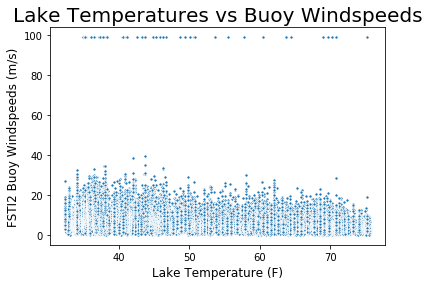

In [25]:
sns.scatterplot(full_data.lake_temp, full_data.buoy_wspd, s=10)
plt.title("Lake Temperatures vs Buoy Windspeeds", size=20);
plt.xlabel('Lake Temperature (F)', size=12)
plt.ylabel('FSTI2 Buoy Windspeeds (m/s)', size=12);

<a id='garden_ohare_lake_jan011995_dec312018'></a>
# Dates: January 01, 1995 - December 31, 2018

#### 8766 days

### Datasets included:
 - O'Hare weather data

 - Botanical Garden
    
 - Lake Michigan Daily average temperatures

### Data Sources
#### [CHICAGO OHARE INTERNATIONAL AIRPORT, IL US](https://www.ncdc.noaa.gov/cdo-web/datasets/GHCND/stations/GHCND:USW00094846/detail)
 - Source: [National Centers for Environmental Information](https://www.ncdc.noaa.gov/cdo-web/search)  
 - [GHCN (Global Historical Climatology Network) – Daily Documentation](https://www1.ncdc.noaa.gov/pub/data/cdo/documentation/GHCND_documentation.pdf)
  - ID	GHCND:USW00094846  
    41.995 N 87.9336 W 
 - [Airport Information](https://www.flychicago.com/ohare/home/pages/default.aspx)

#### [CHICAGO BOTANIC GARDEN, IL US](https://www.ncdc.noaa.gov/cdo-web/datasets/GHCND/stations/GHCND:USC00111497/detail)
 - Source: [National Centers for Environmental Information](https://www.ncdc.noaa.gov/cdo-web/search)
 - [GHCN (Global Historical Climatology Network) – Daily Documentation](https://www1.ncdc.noaa.gov/pub/data/cdo/documentation/GHCND_documentation.pdf)
  - ID GHCND:USC00111497
    42.13987 N 87.78537 W
 - [Garden Information](https://www.chicagobotanic.org/?gclid=CjwKCAjw8e7mBRBsEiwAPVxxiFAzbi0I4VKZUO1z3uxcDI36xORzYwbOtmUWGVoUqxRHEi8elJFV2RoCmaoQAvD_BwE)

    
#### [Lake Michigan](https://www.google.com/search?q=lake+michigan&oq=lake+michigan&aqs=chrome.0.69i59j69i60l3j69i59j0.3015j0j9&sourceid=chrome&ie=UTF-8)
 - Source: [Great Lakes Statistics: Average Surface Water Temperature from the Great Lakes Surface Environmental Analysis (GLSEA)](https://coastwatch.glerl.noaa.gov/statistic/statistic.html)
 - 44.0 -87.0 (44° 00' 0.00" N 87° 00' 0.00" W)
 - [Data Set for 2018](https://coastwatch.glerl.noaa.gov/ftp/glsea/avgtemps/2018/glsea-temps2018_1024.dat)

### Note: The Lake Michigan Dataset only includes daily averages through the end of 2018.

In [8]:
import pandas as pd

In [9]:
garden = pd.read_csv('data/garden/jan011995_may012019.csv')
print(garden.shape)
garden.head()

(8882, 9)


,STATION,DATE,PRCP,SNOW,SNWD,TMAX,TMIN,TOBS,WDMV
0,USC00111497,1995-01-01,0.11,1.5,3.0,36.0,21.0,24.0,NaN
1,USC00111497,1995-01-02,0.00,0.0,1.0,24.0,7.0,12.0,NaN
2,USC00111497,1995-01-03,0.00,0.0,1.0,25.0,10.0,11.0,NaN
3,USC00111497,1995-01-04,0.00,0.0,1.0,18.0,-1.0,1.0,NaN
4,USC00111497,1995-01-05,0.00,0.0,1.0,6.0,-1.0,3.0,NaN


In [10]:
garden = garden.drop(columns=['STATION', 'WDMV'])
print(garden.shape)
garden.head()

(8882, 7)


,DATE,PRCP,SNOW,SNWD,TMAX,TMIN,TOBS
0,1995-01-01,0.11,1.5,3.0,36.0,21.0,24.0
1,1995-01-02,0.00,0.0,1.0,24.0,7.0,12.0
2,1995-01-03,0.00,0.0,1.0,25.0,10.0,11.0
3,1995-01-04,0.00,0.0,1.0,18.0,-1.0,1.0
4,1995-01-05,0.00,0.0,1.0,6.0,-1.0,3.0


In [11]:
garden.dtypes

DATE     object
PRCP    float64
SNOW    float64
SNWD    float64
TMAX    float64
TMIN    float64
TOBS    float64
dtype: object

In [12]:
garden.isnull().sum()

DATE      0
PRCP     28
SNOW    315
SNWD    362
TMAX     10
TMIN     11
TOBS     17
dtype: int64

In [13]:
garden.rename(mapper={'PRCP': 'garden_prcp',
                      'SNOW': 'garden_snfall',
                      'SNWD': 'garden_sndpth',
                     'TMAX': 'garden_maxtmp',
                     'TMIN': 'garden_mintmp',
                     'TOBS': 'garden_tobs'},
             axis=1,
             inplace=True)

garden.head()

,DATE,garden_prcp,garden_snfall,garden_sndpth,garden_maxtmp,garden_mintmp,garden_tobs
0,1995-01-01,0.11,1.5,3.0,36.0,21.0,24.0
1,1995-01-02,0.00,0.0,1.0,24.0,7.0,12.0
2,1995-01-03,0.00,0.0,1.0,25.0,10.0,11.0
3,1995-01-04,0.00,0.0,1.0,18.0,-1.0,1.0
4,1995-01-05,0.00,0.0,1.0,6.0,-1.0,3.0


In [14]:
ohare = pd.read_csv('data/ohare/jan011995_may012019.csv')
print(ohare.shape)
ohare.head()

(8884, 10)


,STATION,DATE,AWND,PRCP,SNOW,SNWD,TMAX,TMIN,WDF2,WSF2
0,USW00094846,1995-01-01,16.11,0.02,0.2,1.0,27,11,NaN,NaN
1,USW00094846,1995-01-02,14.09,0.00,0.0,1.0,21,8,NaN,NaN
2,USW00094846,1995-01-03,12.53,0.00,0.0,1.0,18,3,NaN,NaN
3,USW00094846,1995-01-04,12.30,0.00,0.0,1.0,7,-1,NaN,NaN
4,USW00094846,1995-01-05,16.33,0.00,0.0,0.0,19,-1,NaN,NaN


In [15]:
ohare.rename(mapper={'AWND': 'ohare_wspd',
                     'PRCP': 'ohare_prcp',
                     'SNOW': 'ohare_snfall',
                     'SNWD': 'ohare_sndpth',
                     'TAVG': 'ohare_atmp',
                     'TMAX': 'ohare_maxtmp',
                     'TMIN': 'ohare_mintmp',
                     'WDF2': 'ohare_w2dir',
                     'WSF2': 'ohare_w2spd'},
             axis=1,
             inplace=True)

ohare.head()

,STATION,DATE,ohare_wspd,ohare_prcp,ohare_snfall,ohare_sndpth,ohare_maxtmp,ohare_mintmp,ohare_w2dir,ohare_w2spd
0,USW00094846,1995-01-01,16.11,0.02,0.2,1.0,27,11,NaN,NaN
1,USW00094846,1995-01-02,14.09,0.00,0.0,1.0,21,8,NaN,NaN
2,USW00094846,1995-01-03,12.53,0.00,0.0,1.0,18,3,NaN,NaN
3,USW00094846,1995-01-04,12.30,0.00,0.0,1.0,7,-1,NaN,NaN
4,USW00094846,1995-01-05,16.33,0.00,0.0,0.0,19,-1,NaN,NaN


In [16]:
ohare.isnull().sum()

STATION           0
DATE              0
ohare_wspd        9
ohare_prcp        1
ohare_snfall    186
ohare_sndpth    376
ohare_maxtmp      0
ohare_mintmp      0
ohare_w2dir     404
ohare_w2spd     404
dtype: int64

In [17]:
lake_mic = pd.read_csv('data/lake_michigan/lake_michigan_water_temp_1995_2019_dateTime.csv')
print(lake_mic.shape)
lake_mic.head()

(8766, 2)


,DATE,lake_temp
0,1995-01-01,5.02
1,1995-01-02,4.95
2,1995-01-03,0.20
3,1995-01-04,0.20
4,1995-01-05,0.20


In [18]:
lake_mic.isnull().sum()

DATE         0
lake_temp    0
dtype: int64

In [19]:
garden.DATE = pd.to_datetime(garden.DATE)
garden.dtypes

DATE             datetime64[ns]
garden_prcp             float64
garden_snfall           float64
garden_sndpth           float64
garden_maxtmp           float64
garden_mintmp           float64
garden_tobs             float64
dtype: object

In [20]:
ohare.DATE = pd.to_datetime(ohare.DATE)
ohare.dtypes

STATION                 object
DATE            datetime64[ns]
ohare_wspd             float64
ohare_prcp             float64
ohare_snfall           float64
ohare_sndpth           float64
ohare_maxtmp             int64
ohare_mintmp             int64
ohare_w2dir            float64
ohare_w2spd            float64
dtype: object

In [21]:
ohare.drop(columns='STATION', inplace=True)

In [22]:
lake_mic.DATE = pd.to_datetime(lake_mic.DATE)
lake_mic.dtypes

DATE         datetime64[ns]
lake_temp           float64
dtype: object

In [23]:
data = pd.merge(garden, lake_mic, on='DATE', right_index=False, left_index=True)
print(data.shape)
data.head()

(8763, 8)


,DATE,garden_prcp,garden_snfall,garden_sndpth,garden_maxtmp,garden_mintmp,garden_tobs,lake_temp
0,1995-01-01,0.11,1.5,3.0,36.0,21.0,24.0,5.02
1,1995-01-02,0.00,0.0,1.0,24.0,7.0,12.0,4.95
2,1995-01-03,0.00,0.0,1.0,25.0,10.0,11.0,0.20
3,1995-01-04,0.00,0.0,1.0,18.0,-1.0,1.0,0.20
4,1995-01-05,0.00,0.0,1.0,6.0,-1.0,3.0,0.20


In [24]:
data = pd.merge(data, ohare, on='DATE', right_index=False, left_index=True)
print(data.shape)
data.head()

(8763, 16)


,DATE,garden_prcp,garden_snfall,garden_sndpth,garden_maxtmp,garden_mintmp,garden_tobs,lake_temp,ohare_wspd,ohare_prcp,ohare_snfall,ohare_sndpth,ohare_maxtmp,ohare_mintmp,ohare_w2dir,ohare_w2spd
0,1995-01-01,0.11,1.5,3.0,36.0,21.0,24.0,5.02,16.11,0.02,0.2,1.0,27,11,NaN,NaN
1,1995-01-02,0.00,0.0,1.0,24.0,7.0,12.0,4.95,14.09,0.00,0.0,1.0,21,8,NaN,NaN
2,1995-01-03,0.00,0.0,1.0,25.0,10.0,11.0,0.20,12.53,0.00,0.0,1.0,18,3,NaN,NaN
3,1995-01-04,0.00,0.0,1.0,18.0,-1.0,1.0,0.20,12.30,0.00,0.0,1.0,7,-1,NaN,NaN
4,1995-01-05,0.00,0.0,1.0,6.0,-1.0,3.0,0.20,16.33,0.00,0.0,0.0,19,-1,NaN,NaN


In [25]:
data.tail()

,DATE,garden_prcp,garden_snfall,garden_sndpth,garden_maxtmp,garden_mintmp,garden_tobs,lake_temp,ohare_wspd,ohare_prcp,ohare_snfall,ohare_sndpth,ohare_maxtmp,ohare_mintmp,ohare_w2dir,ohare_w2spd
8761,2018-12-27,0.00,0.0,0.0,49.0,26.0,40.0,4.17,15.66,0.66,0.0,0.0,53,39,170.0,21.9
8762,2018-12-28,0.47,0.0,0.0,54.0,37.0,38.0,4.04,15.21,0.08,0.2,0.0,53,30,230.0,23.9
8763,2018-12-29,0.11,0.1,0.0,38.0,26.0,27.0,4.03,7.61,0.05,0.9,0.0,30,22,240.0,21.0
8764,2018-12-30,0.03,0.3,0.0,31.0,19.0,21.0,4.07,11.18,0.00,0.0,0.0,36,19,210.0,19.9
8765,2018-12-31,0.06,0.0,1.0,37.0,21.0,36.0,4.07,8.72,0.86,0.0,0.0,39,31,360.0,25.1


In [28]:
data.to_csv('data/merged/garden_ohare_lake/jan011995_dec312018.csv', index=False)

In [29]:
merged = pd.read_csv('data/merged/garden_ohare_lake/jan011995_dec312018.csv')
print(merged.shape)
merged.head()

(8763, 16)


,DATE,garden_prcp,garden_snfall,garden_sndpth,garden_maxtmp,garden_mintmp,garden_tobs,lake_temp,ohare_wspd,ohare_prcp,ohare_snfall,ohare_sndpth,ohare_maxtmp,ohare_mintmp,ohare_w2dir,ohare_w2spd
0,1995-01-01,0.11,1.5,3.0,36.0,21.0,24.0,5.02,16.11,0.02,0.2,1.0,27,11,NaN,NaN
1,1995-01-02,0.00,0.0,1.0,24.0,7.0,12.0,4.95,14.09,0.00,0.0,1.0,21,8,NaN,NaN
2,1995-01-03,0.00,0.0,1.0,25.0,10.0,11.0,0.20,12.53,0.00,0.0,1.0,18,3,NaN,NaN
3,1995-01-04,0.00,0.0,1.0,18.0,-1.0,1.0,0.20,12.30,0.00,0.0,1.0,7,-1,NaN,NaN
4,1995-01-05,0.00,0.0,1.0,6.0,-1.0,3.0,0.20,16.33,0.00,0.0,0.0,19,-1,NaN,NaN


In [30]:
merged.isnull().sum()

DATE               0
garden_prcp       28
garden_snfall    313
garden_sndpth    358
garden_maxtmp     10
garden_mintmp     11
garden_tobs       17
lake_temp          0
ohare_wspd         7
ohare_prcp         1
ohare_snfall     186
ohare_sndpth     376
ohare_maxtmp       0
ohare_mintmp       0
ohare_w2dir      402
ohare_w2spd      402
dtype: int64

### Looking at the snowfall on the weekend following Thanksgiving 2018.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
data = pd.read_csv('data/merged/garden_ohare_lake/jan011995_dec312018.csv')
print(data.shape)
print()
print(data.columns)
print()
print(data.isnull().sum())
print()
data.head()

(8763, 16)

Index(['DATE', 'garden_prcp', 'garden_snfall', 'garden_sndpth',
       'garden_maxtmp', 'garden_mintmp', 'garden_tobs', 'lake_temp',
       'ohare_wspd', 'ohare_prcp', 'ohare_snfall', 'ohare_sndpth',
       'ohare_maxtmp', 'ohare_mintmp', 'ohare_w2dir', 'ohare_w2spd'],
      dtype='object')

DATE               0
garden_prcp       28
garden_snfall    313
garden_sndpth    358
garden_maxtmp     10
garden_mintmp     11
garden_tobs       17
lake_temp          0
ohare_wspd         7
ohare_prcp         1
ohare_snfall     186
ohare_sndpth     376
ohare_maxtmp       0
ohare_mintmp       0
ohare_w2dir      402
ohare_w2spd      402
dtype: int64



,DATE,garden_prcp,garden_snfall,garden_sndpth,garden_maxtmp,garden_mintmp,garden_tobs,lake_temp,ohare_wspd,ohare_prcp,ohare_snfall,ohare_sndpth,ohare_maxtmp,ohare_mintmp,ohare_w2dir,ohare_w2spd
0,1995-01-01,0.11,1.5,3.0,36.0,21.0,24.0,5.02,16.11,0.02,0.2,1.0,27,11,NaN,NaN
1,1995-01-02,0.00,0.0,1.0,24.0,7.0,12.0,4.95,14.09,0.00,0.0,1.0,21,8,NaN,NaN
2,1995-01-03,0.00,0.0,1.0,25.0,10.0,11.0,0.20,12.53,0.00,0.0,1.0,18,3,NaN,NaN
3,1995-01-04,0.00,0.0,1.0,18.0,-1.0,1.0,0.20,12.30,0.00,0.0,1.0,7,-1,NaN,NaN
4,1995-01-05,0.00,0.0,1.0,6.0,-1.0,3.0,0.20,16.33,0.00,0.0,0.0,19,-1,NaN,NaN


In [11]:
data[(data['DATE'] >= '2018-11-24') & (data['DATE'] <= '2018-11-27')]

,DATE,garden_prcp,garden_snfall,garden_sndpth,garden_maxtmp,garden_mintmp,garden_tobs,lake_temp,ohare_wspd,ohare_prcp,ohare_snfall,ohare_sndpth,ohare_maxtmp,ohare_mintmp,ohare_w2dir,ohare_w2spd
8725,2018-11-24,0.15,0.0,0.0,51.0,39.0,45.0,6.68,10.74,0.18,0.0,0.0,47,40,240.0,23.9
8726,2018-11-25,0.00,0.0,0.0,48.0,38.0,39.0,6.65,15.21,1.20,3.3,0.0,40,33,20.0,33.1
8727,2018-11-26,1.87,3.5,3.0,39.0,26.0,26.0,6.46,17.45,0.39,5.1,7.1,33,24,20.0,38.9
8728,2018-11-27,0.00,0.0,3.0,27.0,22.0,23.0,6.35,8.50,0.00,0.0,5.9,25,19,260.0,15.0
